# New Indian Restaurant
### (The Battle of the Neighborhoods)
##### Capstone Project(Week 2)
__ __

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results](#results)
* [Discussion](#discusions)
* [Conclusion](#conclusion)

### Installing and Importing of Libraries

In [1]:
try:
    !conda install -c conda-forge geopy --yes
    print("GeoPy has been successfully installed!\n")
    !conda install -c conda-forge folium=0.5.0 --yes
    print("Folium has been successfully installed!\n")
    print("Libraries has been successfully installed!\n")
except:
    print("ERROR: could not install Libraries!\n")

try:
    print("Importing libraries...\n")
    import numpy as np # library to handle data in a vectorized manner
    import pandas as pd # library for data analysis
    from pandas.io.json import json_normalize
    from IPython.display import Image 
    from IPython.core.display import HTML 
    import matplotlib as mp # library for visualization
    import matplotlib.cm as cm
    import matplotlib.pyplot as plt
    import matplotlib.colors as colors
    import requests # library to handle requests
    from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
    from sklearn.cluster import KMeans # import k-means from clustering stage
    import folium # map rendering library
    from time import sleep
    print("All libraries imported successfully!\n")
except:
    print("ERROR: Could not import all libraries!\n")

%matplotlib inline

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.6.7                |           py36_0         869 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    geopy-1.18.1               |             py_0          51 KB  conda-forge
    openssl-1.1.1b             |       h14c3975_0         4.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.9 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.49-py_0

The following packages will be UPDATED:

  conda                                        4.6.4-py36_0 --> 4.6.7-py36_0
  geopy              conda-forge/linux-64::geopy



## Introduction: Business Problem <a name="introduction"></a>

For many people in the world its always a dream to have a business in America or Europe. When people look towards these destinations they many questions.

In this project we will try to find a one of the best location in the world’s top two business centers (Toronto Vs San Francisco) for opening a new Indian restaurant. Choice of business city will depend upon many factors but here for opening a new Indian restaurant we will consider Only two of them 1. Size of Indian Community and 2. Immigration and Business Policies. Based on these two factors we will have a city of choice.

Once a business city is decided, we will try to find a best location for Indian restaurant in that city. In this process we will try to find pre existing Indian Restaurants in that city and look for a location where there is little ore no Indian restaurant restaurants available and it is close to the city center.

So our key question is - How to find a best location for opening a Indian Restaurant in selected city?

Target of this project will be Indian origian people who interested in opening a Indian restaurant in abroad like Toronto or San Francisco

We will use data science tools and Foursquare API to generate and process the neighborhoods information and location. Advantages of each area will then be clearly expressed for best possible final location for stakeholders.

## Data <a name="data"></a>

Based on definition of our problem, factors that will influence our decission are:
* Number of Indian community in Toronto and San Francisco
* Immigration and Business Policies of USA and Canada
* Number of any type existing restaurants in the neighborhood
* Number of Indian Restaurant in the Neighborhood
* Distance to Indian Restaurants in the neighborhood, if any
* distance of neighborhood from city center

We decided to use regularly spaced grid of locations, centered around city center, to define our neighborhoods.

Following data sources will be needed to extract/generate the required information:
* centers of candidate areas will be generated algorithmically and approximate addresses of centers of those areas will be obtained using **Google Maps API reverse geocoding**
* number of restaurants and their type and location in every neighborhood will be obtained using **Foursquare API**
* coordinate of Berlin center will be obtained using **Google Maps API geocoding** of well known Berlin location (Alexanderplatz)

### City of Choice
#### Toronto Vs San Francisco

##### Toronto and San Francisco are well developed and multi ethnic and multi culture business centers but Due to resent changes in USA business policies and H1-B visa and reforms, it has become a bit risky and fificult for outsider to open a new business.
##### So Toronto, Canada will be the first city of choice for opening a new Indian restaurant. It has very Open and favorable business policies and environment for outsiders.
##### ***Data Source – Resent News and Media Report

Now let us have some web scraping for Demography of Toronto

In [2]:
try:
    print("Reading web page ...")
    url = 'https://en.wikipedia.org/wiki/Indo-Canadians'
    indotoronto = pd.read_html(url)
    print("Web page read  successful !")
except:
    print("ERROR: could not read web page.\n")

Reading web page ...
Web page read  successful !


In [3]:
type(indotoronto)

list

In [4]:
len(indotoronto)

22

In [5]:
indotoronto[3]

,City,Province,Indian,Percentage
0,Toronto,Ontario,643370,10.4%
1,Greater Vancouver,British Columbia,243135,10.0%
2,Montréal,Quebec,48485,1.2%
3,Calgary,Alberta,90625,6.5%
4,Edmonton,Alberta,72245,5.5%
5,Ottawa,Ontario,28945,2.2%
6,Winnipeg,Manitoba,30800,4.0%
7,Hamilton,Ontario,23390,3.1%
8,Victoria,British Columbia,9180,2.5%
9,Kitchener,Ontario,19295,3.7%


##### As of 2014 more then 10% population of Toronto are of Indian origin which presents good opertunities for Indian Restaurant Busniess in Toronto

### Demographics of Toronto 2006 to 2016

In [6]:
try:
    print("Reading csv File ...")
    File = 'TorontoDemography2016.csv'
    TDdf = pd.read_csv(File)
    print("csv file read  successful !")
except:
    print("ERROR: could not read csv file.\n")

Reading csv File ...
csv file read  successful !


In [7]:
TDdf.head()

,Population group,Population group.1,Population (2016),% of total population (2016),Population (2011),% of total population (2011),Population (2006),% of total population (2006)
0,European (White),European (White),1282750,NaN,1292365,NaN,1300330,NaN
1,Visible minority group,South Asian,338965,NaN,317100,NaN,298370,NaN
2,Visible minority group,Chinese,299460,NaN,278390,NaN,283075,NaN
3,Visible minority group,Black,239850,NaN,218160,NaN,208555,NaN
4,Visible minority group,Filipino,152715,NaN,132445,NaN,102555,NaN


In [8]:
TDdf.drop(['Population group', '% of total population (2016)','% of total population (2011)', '% of total population (2006)'], axis=1, inplace=True)

In [9]:
TDdf.columns= ['Ethnic group','2016','2011','2006']
TDdf.set_index('Ethnic group', inplace=True)
TDdf.index.name = None
TDdf.head()

,2016,2011,2006
European (White),1282750,1292365,1300330
South Asian,338965,317100,298370
Chinese,299460,278390,283075
Black,239850,218160,208555
Filipino,152715,132445,102555


#### Multi Ethnicity  of Toronto
##### Toronto None European Demography Data Cleanup - Remove 'Total population', 'European (White)','Total visible minority population'

In [10]:
TDdf1=TDdf[['2016']]

TDdf1 = TDdf1.drop('Total population') # Total Population is Droped
TDdf1 = TDdf1.drop('Total visible minority population')  # Total visible minority Population is Droped
TDdf1 = TDdf1.drop('European (White)') # European (White) is also Droped

TDdf1.sort_values(["2016"], ascending=False, inplace=True)
TDdf1.head()

,2016
South Asian,338965
Chinese,299460
Black,239850
Filipino,152715
Latin American,77160


##### Visualization of Multi Ethnicity of Toronto

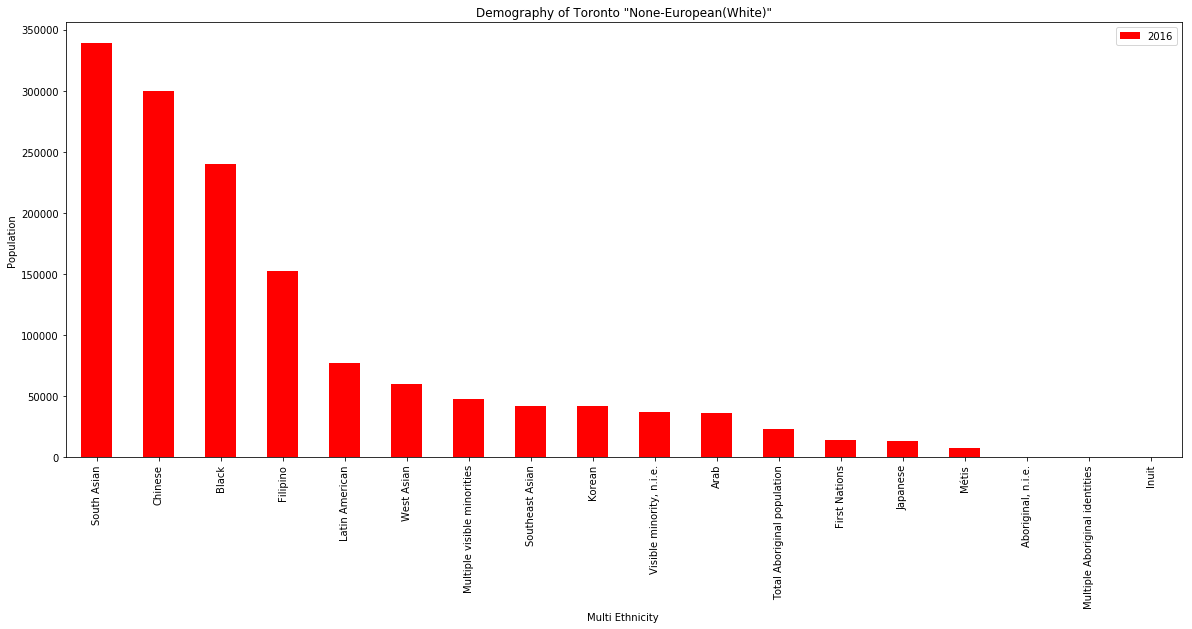

In [11]:

TDdf1.sort_values(["2016"], ascending=False, inplace=True)
TDdf1.plot(kind='bar', figsize=(20, 8), color='red')

plt.title('Demography of Toronto "None-European(White)"')
plt.ylabel('Population')
plt.xlabel('Multi Ethnicity ')
plt.show()

##### A part from European White South Asian community has a large presence in Toronto which is good for Indian Restaurant Business

##### For Indian Restaurant we are interested in South Asian group so Let us see How every five years this community is growing in Toronto

In [12]:
TDdf = TDdf.loc[['South Asian']].transpose()
TDdf

,South Asian
2016,338965
2011,317100
2006,298370


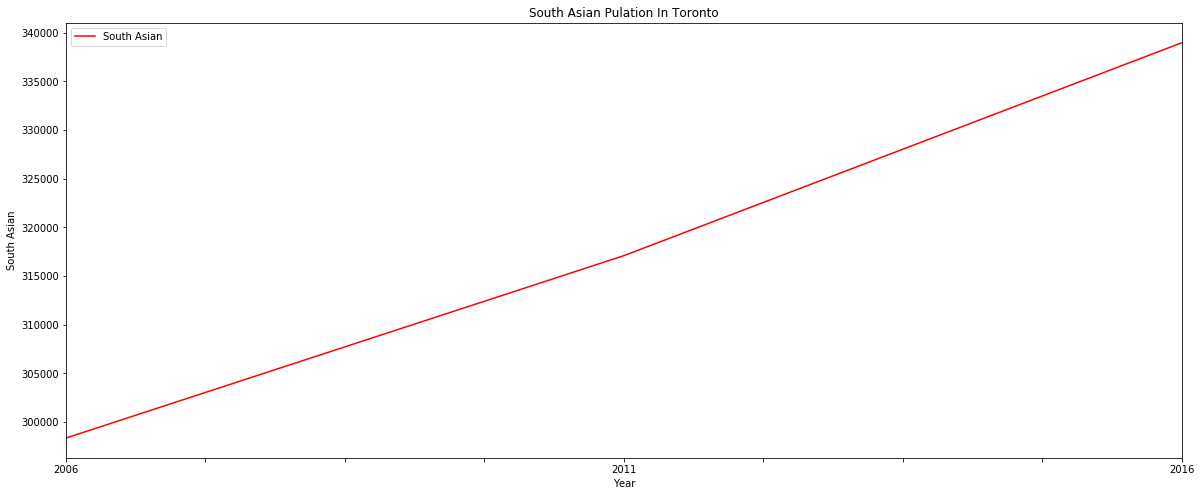

In [13]:
TDdf.sort_values(["South Asian"], ascending=True, inplace=True)
TDdf.plot(kind='line', figsize=(20, 8), color='red')

plt.title('South Asian Pulation In Toronto')
plt.ylabel('South Asian')
plt.xlabel('Year')
plt.show()

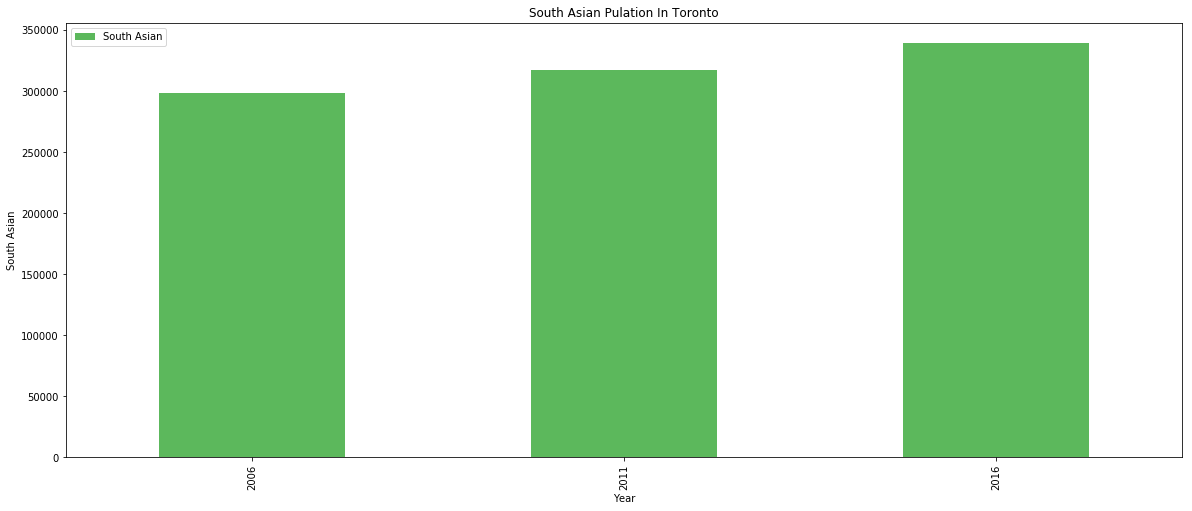

In [14]:
TDdf.sort_values(["South Asian"], ascending=True, inplace=True)
TDdf.plot(kind='bar', figsize=(20, 8), color='#5cb85c', width=0.5)

plt.title('South Asian Pulation In Toronto')
plt.ylabel('South Asian')
plt.xlabel('Year')
plt.show()

#### Indian Immigration to Canada - 1980 - 2013 data 

In [15]:
try:
    print("Reading Excel File ...")
    df_can = pd.read_excel('https://ibm.box.com/shared/static/lw190pt9zpy5bd1ptyg2aw15awomz9pu.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)
    print("Excel file read  successful !")
except:
    print("ERROR: could not read Excel file.\n")


Reading Excel File ...
Excel file read  successful !


#### Let's view the top 1 rows of the dataset

In [16]:
df_can.head(1)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004


We can also veiw the bottom 5 rows of the dataset using the `tail()` function.

Let's clean the data set to remove a few unnecessary columns. We can use *pandas* `drop()` method as follows:

In [17]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


Let's rename the columns so that they make sense. We can use `rename()` method by passing in a dictionary of old and new names as follows:

In [18]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

Example: Let's try filtering on the list of countries ('Country').

In [19]:
df_can.set_index('Country', inplace=True)

In [20]:
df_can.head(1)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004


In [21]:
# Remove the name of the index
df_can.index.name = None

Column names that are integers (such as the years) might introduce some confusion. For example, when we are referencing the year 2013, one might confuse that when the 2013th positional index. 

To avoid this ambuigity, let's convert the column names into strings: '1980' to '2013'.

In [22]:
df_can.columns = list(map(str, df_can.columns))

Since we converted the years to string, let's declare a variable that will allow us to easily call upon the full range of years:

In [23]:
# useful for plotting later on
years = list(map(str, range(1980, 2014)))

### Filtering based on a criteria
To filter the dataframe based on a condition, we simply pass the condition as a boolean vector. 

For example, Let's filter the dataframe to show the data on Asian countries (AreaName = Asia).

In [24]:
df_can[(df_can['Continent']=='Asia') & (df_can['Region']=='Southern Asia')]


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,2660,4171,4014,2897,2939,2104,4721,2694,2640,3789
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,1,5,10,7,36,865,1464,1879,1075,487
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,6348,5837,7480,6974,6475,6580,7477,7479,7534,11291
Maldives,Asia,Southern Asia,Developing regions,0,0,0,1,0,0,0,...,1,0,0,2,1,7,4,3,1,1
Nepal,Asia,Southern Asia,Developing regions,1,1,6,1,2,4,13,...,404,607,540,511,581,561,1392,1129,1185,1308
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4495,4930,4714,4123,4756,4547,4422,3309,3338,2394


Before we proceed: let's review the changes we have made to our dataframe.

Step 1: Get the data set for India, and display dataframe.

In [25]:
### type your answer here
df_I = df_can.loc[['India'], years] 
df_I.head()


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


In [26]:
df_I = df_I.transpose()
df_I.index.names = ['Year']
df_I.columns=['Indian']
df_I.head()

,Indian
Year,
1980,8880
1981,8670
1982,8147
1983,7338
1984,5704


*pandas* will auomatically graph the two countries on the same graph. Go ahead and plot the new transposed dataframe. Make sure to add a title to the plot and label the axes.

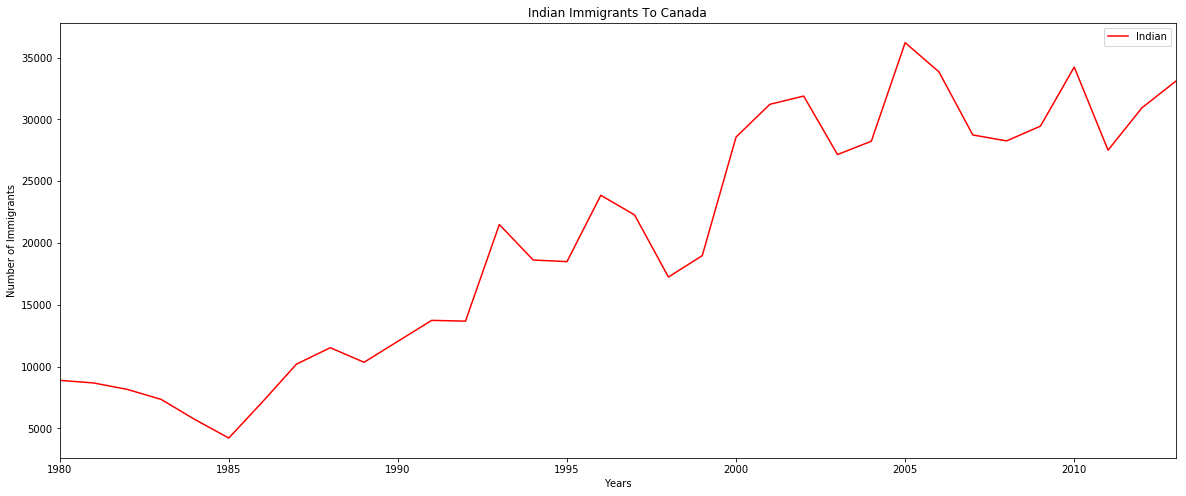

In [27]:
### type your answer here
df_I.index = df_I.index.map(int)
df_I.plot(kind='line', figsize=(20, 8), color='red')

plt.title('Indian Immigrants To Canada')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

#### Using Linear Regression Predict Indian immigration to Canada In next 5 years

In [28]:
# df_I.reset_index(drop=False,level=0, inplace=True)
df_I=df_I.reset_index()

In [29]:
df_I.head()

,Year,Indian
0,1980,8880
1,1981,8670
2,1982,8147
3,1983,7338
4,1984,5704


In [30]:
# create Train and Test Data
can= np.random.rand(len(df_I)) < 0.8
train = df_I[can]
test = df_I[~can]

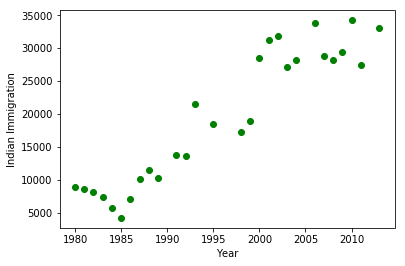

In [31]:
# train data distrubtion
plt.scatter(train.Year, train.Indian,  color='green')
plt.xlabel("Year")
plt.ylabel("Indian Immigration")
plt.show()

In [32]:
# Modeling
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Year']])
train_y = np.asanyarray(train[['Indian']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[926.40287637]]
Intercept:  [-1829496.59113222]


Text(0, 0.5, 'Indian Immigration')

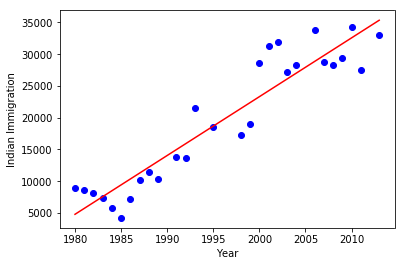

In [33]:
# Plot Output
plt.scatter(train.Year, train.Indian,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Year")
plt.ylabel("Indian Immigration")

In [34]:
#Evaluation
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Year']])
test_y = np.asanyarray(test[['Indian']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 3438.12
Residual sum of squares (MSE): 17746047.93
R2-score: 0.62


##### Train the Model again with all data

In [35]:
# Modeling
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(df_I[['Year']])
train_y = np.asanyarray(df_I[['Indian']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[934.26799083]]
Intercept:  [-1844915.92605042]


In [36]:
cof = 934.26799083
Intercept = -1844915.92605042

try:
    for x in range(2014, 2026):
        y = int(Intercept + cof*x)
        df = pd.DataFrame([[x,y]], columns=['Year', 'Indian'])
        df["Year"] = pd.to_numeric(df["Year"])
        df_I = df_I.append(df, ignore_index=True)

except:
    print ("ERROR: Failed to predict immigration.")
df_I["Year"] = pd.to_numeric(df_I["Year"])
df_I.tail(15)

,Year,Indian
31,2011,27509
32,2012,30933
33,2013,33087
34,2014,36699
35,2015,37634
36,2016,38568
37,2017,39502
38,2018,40436
39,2019,41371
40,2020,42305


#### Visualiz Predicted Indian Immigration up to 2025

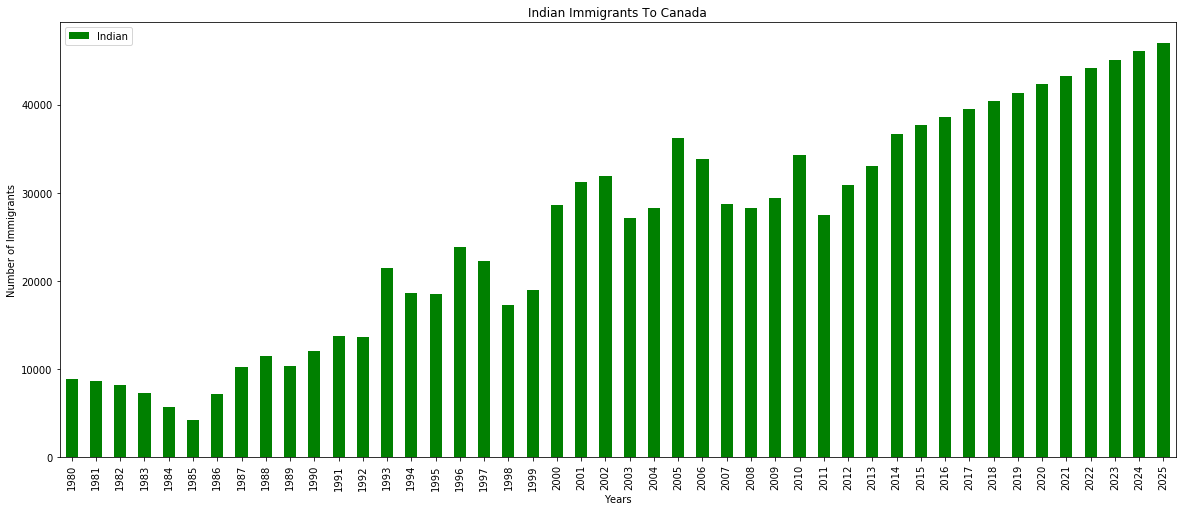

In [37]:
df_I.set_index('Year', inplace=True)

df_I.index = df_I.index.map(int)
df_I.plot(kind='bar', figsize=(20, 8), color='green')

plt.title('Indian Immigrants To Canada')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

### Data Preaeration
#### Scraping and Cleaning Toronto Neighborhood Data'
##### Data Source 1  - https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M
##### Data Source 2  - http://cocl.us/Geospatial_data
##### Data Source 3  - Foursquare API Data
##### **** Some of the Scraping Dataframe has been save as csv file to re-use (poor Net Connectivity)

##### Check object type of wikipage object

##### wikipage object type is list, get the length of list object

##### Length of wikipage list is 3, check all 3 elements of list one by one

##### wikipage is nested list and our relevent data is in wikipage[0]

##### Create a data frame using list wikipage[0]

In [38]:
try:
    print("Reading csv File ...")
    File = 'TorontoNeighbor.csv'
    neighbordf = pd.read_csv(File)
    print("csv file read  successful !")
except:
    print("ERROR: could not read csv file.\n")

Reading csv File ...
csv file read  successful !


In [39]:
neighbordf.head()

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


##### Clear all rows where Borough is "Not assigned"and reset index - Cleenup neighbor data frame

In [40]:
# Replace all 'Not assigned' in borough with np.nan
neighbordf.replace({'Borough': 'Not assigned' }, np.nan, inplace = True)
# Drop whole row with NaN in "Borough" column
neighbordf.dropna(subset=["Borough"], axis=0, inplace=True)
# reset index, because we droped some rows
neighbordf.reset_index(drop=True, inplace=True)
neighbordf.head()

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M5A,Downtown Toronto,Regent Park
4,M6A,North York,Lawrence Heights


##### Merge neighbourhood with same postal code - Prepare neighbour data frame

In [41]:
# Groupby and join can be used for the purpose
neighbordf = neighbordf.groupby(['Postal Code','Borough'])['Neighborhood'].apply(', '.join).reset_index()
neighbordf.head()

,Postal Code,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


##### Set Neighborhood =  Brough where neighborhood is equal to 'Not assigned' - Prepare neighbour data frame

In [42]:
neighbordf['Neighborhood'] = np.where(neighbordf['Neighborhood'] == 'Not assigned', neighbordf['Borough'], neighbordf['Neighborhood'])


In [43]:
neighbordf.head()

,Postal Code,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


##### Now our neighborhood data is cleaned so check its shape

In [44]:
neighbordf.shape

(103, 3)

#### __Create a new dataframe 'df' with rows comtaining 'Toronto' in Borough column and reset index__

In [45]:
Tdf = neighbordf[neighbordf['Borough'].str.contains('Toronto')]
Tdf.reset_index(drop=True, inplace=True)
print(Tdf.shape)
Tdf.head()

(38, 3)


,Postal Code,Borough,Neighborhood
0,M4E,East Toronto,The Beaches
1,M4K,East Toronto,"The Danforth West, Riverdale"
2,M4L,East Toronto,"The Beaches West, India Bazaar"
3,M4M,East Toronto,Studio District
4,M4N,Central Toronto,Lawrence Park


##### Create a new dataframe Add two columns ('Latitude', 'Longitude') to dataframe 

##### Gathering the Latitude and Longitude coordinates for each borough using geolocater

#### There are problems getting latitude and longitude

#### Get Toronto Pstal Code Latitude and Longitude

In [46]:
try:
    print("Reading csv File from web site ...")
    url = 'http://cocl.us/Geospatial_data'
    wikipage1 = pd.read_csv(url)
    print("Web page file csv read  successful !")
except:
    print("ERROR: could not read web page csv file.\n")

Reading csv File from web site ...
Web page file csv read  successful !


In [47]:
type(wikipage1)

pandas.core.frame.DataFrame

In [48]:
Postaldf = pd.DataFrame(wikipage1)

In [49]:
Postaldf.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


#### Join Neighborhood data frame with Postal data frame

In [50]:
Ndf = pd.merge(neighbordf, Postaldf, on='Postal Code')

##### Find and drop rows that contains blank value

In [51]:
Ndf.dropna(inplace = True)
Ndf.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


#### Visualize Toronto and it's neighborhood by Creating a map of Toronto with neighborhoods superimposed on top.


#### Clustring Toronto Neighbourhood

##### Use geopy library to get the latitude and longitude values of Toronto City.

In [52]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.653963, -79.387207.


In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>ny_explorer</em>, as shown below.

In [53]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
folium.CircleMarker(
    [latitude, longitude],
    radius=5,
    popup='Toronto',
    color='red',
    fill=True,
    fill_color='red',
    fill_opacity=0.6,
    parse_html=False).add_to(map_toronto) 

  # add markers to map
for lat, lng, borough, neighborhood in zip(Ndf['Latitude'], Ndf['Longitude'], Ndf['Borough'], Ndf['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)
    
map_toronto

let's simplify the above map and segment and cluster only the neighborhoods in Central Toronto. So let's slice the original dataframe and create a new dataframe of the Central Toronto data.

#### Now Slice dataframe with Borough containing the word "Toronto"

In [54]:
Tdf = Ndf[Ndf['Borough'].str.contains('Toronto')]
Tdf.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
37,M4E,East Toronto,The Beaches,43.676357,-79.293031
41,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
42,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572
43,M4M,East Toronto,Studio District,43.659526,-79.340923
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


##### List the Borugh that contains 'Toronto'

In [55]:
Tdf['Borough'].unique()

array(['East Toronto', 'Central Toronto', 'Downtown Toronto',
       'West Toronto'], dtype=object)

##### We have 4 Boroughs that contains "Toronto" so we will use for color foe these boroughs - 'red','blue', 'green','yellow'

##### Get the latitude and longitude boroughs in Toronto and create a map

In [56]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.653963, -79.387207.


In [57]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)
# add markers to map(Toronto)
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='Toronto',
    color='red',
    fill=True,
    fill_color='red',
    fill_opacity=0.6,
    parse_html=False).add_to(map_toronto)
#color = list(np.random.choice(range(256), size=len(Tdf['Borough'].unique())))
color = ['red','blue', 'green','yellow']
for Borough, col in zip(Tdf['Borough'].unique(), color):
    # print(col)
    # Dataframe for borough
    Bdf = Tdf[Tdf['Borough'] == Borough].reset_index(drop=True)
    # Bdf.head()
    
    #  latitude and longitude values of Borough
    address = Borough

    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    
    # add markers to map(borough)
    folium.CircleMarker(
        [latitude, longitude],
        radius=8,
        popup=Borough,
        color=col,
        fill=True,
        fill_color=col,
        fill_opacity=0.6,
        parse_html=False).add_to(map_toronto) 
    
      # add markers to map
    for lat, lng, borough, neighborhood in zip(Bdf['Latitude'], Bdf['Longitude'], Bdf['Borough'], Bdf['Neighborhood']):
        label = '{}, {}'.format(neighborhood, borough)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color=col,
            fill=True,
            fill_color=col,
            fill_opacity=0.7,
            parse_html=False).add_to(map_toronto)
    
map_toronto

In [58]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.653963, -79.387207.


##### Now Let us focus on Central Toronto and siice it s data from Toronto dataframe "Tdf"

In [59]:
CentralTdf = Tdf[Tdf['Borough'] == 'Central Toronto'].reset_index(drop=True)
CentralTdf.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
1,M4P,Central Toronto,Davisville North,43.712751,-79.390197
2,M4R,Central Toronto,North Toronto West,43.715383,-79.405678
3,M4S,Central Toronto,Davisville,43.704324,-79.388790
4,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160


##### Let's get the geographical coordinates of Toronto.

In [60]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Central Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Central Toronto are 43.653963, -79.387207.


As we did with all of Toronto City, let's visualize Central Toronto and its neighborhoods.

In [61]:
# create map of Manhattan using latitude and longitude values
map_Central_Toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(CentralTdf['Latitude'], CentralTdf['Longitude'], CentralTdf['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Central_Toronto)  
    
map_Central_Toronto

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

#### Define Foursquare Credentials and Version

In [62]:
# The code was removed by Watson Studio for sharing.

Your credentails:
CLIENT_ID: KLM3YX5M4BPNZETT5BWB54OYFUOIPMY3OLWU1HYRJLWC4TC0
CLIENT_SECRET:2NZPASHCA2BNERJYMDDXZCL1WTU2NKX5XSKGOZQKYJWPGPXP


#### Let's explore the first neighborhood in our dataframe.

Get the neighborhood's name.

In [63]:
CentralTdf.loc[0, 'Neighborhood']

'Lawrence Park'

Get the neighborhood's latitude and longitude values.

In [64]:
neighborhood_latitude = CentralTdf.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = CentralTdf.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = CentralTdf.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Lawrence Park are 43.7280205, -79.3887901.


#### Now, let's get the top 100 Restaurants that are in Central Toronto - Lawrence Park within a radius of 5000 meters.

First, let's create the GET request URL. Name your URL **url**.

In [65]:
# type your answer here
search_query = 'Indian Restaurant'
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 2500 # define radius

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    VERSION, 
    search_query, 
    radius, 
    LIMIT)
url


'https://api.foursquare.com/v2/venues/search?client_id=KLM3YX5M4BPNZETT5BWB54OYFUOIPMY3OLWU1HYRJLWC4TC0&client_secret=2NZPASHCA2BNERJYMDDXZCL1WTU2NKX5XSKGOZQKYJWPGPXP&ll=43.7280205,-79.3887901&v=20180604&query=Indian Restaurant&radius=2500&limit=100'

Send the GET request and examine the resutls

In [66]:
results = requests.get(url).json()


In [67]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()


,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '54135bf5e4b08f3d2429dfdd', 'name': 'N...",False,54dd1704498e6bef053d2cdf,3305 Yonge St,CA,Toronto,Canada,NaN,1179,"[3305 Yonge St, Toronto ON M4N 2L8, Canada]","[{'label': 'display', 'lat': 43.73014794502956...",43.730148,-79.403153,M4N 2L8,ON,Indian Bread Bar,v-1551787088,119548650
1,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",False,5650eed9498e376aac0c2478,1701 Bayview,CA,Toronto,Canada,Eglinton,2448,"[1701 Bayview (Eglinton), Toronto ON, Canada]","[{'label': 'display', 'lat': 43.7080316171988,...",43.708032,-79.376086,NaN,ON,Indian Street Food Co.,v-1551787088,NaN
2,"[{'id': '4bf58dd8d48988d126941735', 'name': 'G...",False,4bd6e80129eb9c74bac295e1,939 Eglinton Avenue E Unit 102,CA,Toronto,Canada,Brentcliffe Road,2769,[939 Eglinton Avenue E Unit 102 (Brentcliffe R...,"[{'label': 'display', 'lat': 43.71419841678381...",43.714198,-79.360166,NaN,ON,Indian Visa and Consular Services Centre,v-1551787088,NaN
3,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",False,4b7ccc72f964a520e3a52fe3,164 Eglinton Ave E,CA,Toronto,Canada,at Redpath Ave,2278,"[164 Eglinton Ave E (at Redpath Ave), Toronto ...","[{'label': 'display', 'lat': 43.7078104847312,...",43.707810,-79.393296,NaN,ON,Banjara Indian Cuisine,v-1551787088,NaN
4,"[{'id': '4f4532974b9074f6e4fb0104', 'name': 'D...",False,5bc8212cb23dfa002c766d81,285 Indian Road Cres,CA,Toronto,Canada,NaN,1592,"[285 Indian Road Cres, Toronto ON M6P 2G8, Can...","[{'label': 'display', 'lat': 43.73501592317311...",43.735016,-79.406063,M6P 2G8,ON,Toronto Indian Road YMCA Centre,v-1551787088,NaN


In [68]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]
dataframe_filtered.head()

,name,categories,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,id
0,Indian Bread Bar,"[{'id': '54135bf5e4b08f3d2429dfdd', 'name': 'N...",3305 Yonge St,CA,Toronto,Canada,NaN,1179,"[3305 Yonge St, Toronto ON M4N 2L8, Canada]","[{'label': 'display', 'lat': 43.73014794502956...",43.730148,-79.403153,M4N 2L8,ON,54dd1704498e6bef053d2cdf
1,Indian Street Food Co.,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",1701 Bayview,CA,Toronto,Canada,Eglinton,2448,"[1701 Bayview (Eglinton), Toronto ON, Canada]","[{'label': 'display', 'lat': 43.7080316171988,...",43.708032,-79.376086,NaN,ON,5650eed9498e376aac0c2478
2,Indian Visa and Consular Services Centre,"[{'id': '4bf58dd8d48988d126941735', 'name': 'G...",939 Eglinton Avenue E Unit 102,CA,Toronto,Canada,Brentcliffe Road,2769,[939 Eglinton Avenue E Unit 102 (Brentcliffe R...,"[{'label': 'display', 'lat': 43.71419841678381...",43.714198,-79.360166,NaN,ON,4bd6e80129eb9c74bac295e1
3,Banjara Indian Cuisine,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",164 Eglinton Ave E,CA,Toronto,Canada,at Redpath Ave,2278,"[164 Eglinton Ave E (at Redpath Ave), Toronto ...","[{'label': 'display', 'lat': 43.7078104847312,...",43.707810,-79.393296,NaN,ON,4b7ccc72f964a520e3a52fe3
4,Toronto Indian Road YMCA Centre,"[{'id': '4f4532974b9074f6e4fb0104', 'name': 'D...",285 Indian Road Cres,CA,Toronto,Canada,NaN,1592,"[285 Indian Road Cres, Toronto ON M6P 2G8, Can...","[{'label': 'display', 'lat': 43.73501592317311...",43.735016,-79.406063,M6P 2G8,ON,5bc8212cb23dfa002c766d81


##### How many Restorants returned by Foursquare?

In [69]:
print('{} venues were returned by Foursquare.'.format(dataframe.shape[0]))

49 venues were returned by Foursquare.


In [70]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]
# function that extracts the category ID of the venue
def get_category_typeID(row):
    try:
        categories_listID = row['categories']
    except:
        categories_listID = row['venue.categories']
        
    if len(categories_listID) == 0:
        return None
    else:
        return categories_listID[0]['id']
# function that extracts the category of the venue
def get_category_typeName(row):
    try:
        categories_listName = row['categories']
    except:
        categories_listName = row['venue.categories']
        
    if len(categories_listName) == 0:
        return None
    else:
        return categories_listName[0]['name']

# filter the category for each row
dataframe_filtered['categoriesID'] = dataframe_filtered.apply(get_category_typeID, axis=1)
dataframe_filtered['categoriesName'] = dataframe_filtered.apply(get_category_typeName, axis=1)
# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head()
dfs=dataframe_filtered.sort_values(['distance'], ascending=[0])
dfs.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id,categoriesID,categoriesName
36,Grano,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",2035 Yonge St,CA,Toronto,Canada,NaN,3007,"[2035 Yonge St, Toronto ON M4P 2A2, Canada]","[{'label': 'display', 'lat': 43.70171154445089...",43.701712,-79.397318,M4P 2A2,ON,4ad4c05cf964a52004f620e3,4bf58dd8d48988d110941735,Italian Restaurant
47,Coquine Restaurant,"[{'id': '4bf58dd8d48988d10c941735', 'name': 'F...",2075 Yonge St.,CA,Toronto,Canada,at Manor Rd.,2911,"[2075 Yonge St. (at Manor Rd.), Toronto ON M4S...","[{'label': 'display', 'lat': 43.70262346819862...",43.702623,-79.397429,M4S 2A4,ON,4ae24e96f964a5200e8d21e3,4bf58dd8d48988d10c941735,French Restaurant
33,South China Restaurant,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",513 Mt Pleasant Rd.,CA,Toronto,Canada,btwn Millwood & Belsize,2909,[513 Mt Pleasant Rd. (btwn Millwood & Belsize)...,"[{'label': 'display', 'lat': 43.70189912568440...",43.701899,-79.387649,M4S 1J8,ON,4d74693f6820ba7a77ff3dfe,4bf58dd8d48988d145941735,Chinese Restaurant
17,Marigold Indian Bistro,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",552 Mount Pleasant Rd.,CA,Toronto,Canada,NaN,2799,"[552 Mount Pleasant Rd., Toronto ON, Canada]","[{'label': 'display', 'lat': 43.702880859375, ...",43.702881,-79.388008,NaN,ON,5169d445e4b07de190b5c3d6,4bf58dd8d48988d10f941735,Indian Restaurant
13,Debu's Nouvelle Indian Cuisine,[],552 Mt Pleasant,CA,Toronto,Canada,NaN,2797,"[552 Mt Pleasant, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.702893, 'lng':...",43.702893,-79.387958,NaN,ON,4e28c1af52b1c37d35c5b48b,None,None


#### K-Means Clustring

#### Pre-processing
#### Get Numeric Columns 

In [71]:
dfk = dfs[['id','distance', 'lat', 'lng']]
dfk.head()

,id,distance,lat,lng
36,4ad4c05cf964a52004f620e3,3007,43.701712,-79.397318
47,4ae24e96f964a5200e8d21e3,2911,43.702623,-79.397429
33,4d74693f6820ba7a77ff3dfe,2909,43.701899,-79.387649
17,5169d445e4b07de190b5c3d6,2799,43.702881,-79.388008
13,4e28c1af52b1c37d35c5b48b,2797,43.702893,-79.387958


In [72]:
from sklearn.preprocessing import StandardScaler
X = dfk.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 1.50737127, -1.19566789, -0.02671604],
       [ 1.33364836, -1.12219381, -0.03541848],
       [ 1.33002913, -1.18055439,  0.72810422],
       [ 1.13097162, -1.10145569,  0.7000851 ],
       [ 1.1273524 , -1.10047751,  0.70399773],
       [ 1.07668321, -0.18959524,  2.87371279],
       [ 1.07125437, -0.99958799, -0.10584102],
       [ 0.99886982, -0.88303788,  1.70172331],
       [ 0.96448716, -0.39922534,  2.5773354 ],
       [ 0.93734296, -0.9506004 , -0.07577085],
       [ 0.87762571,  1.56583967, -1.79452188],
       [ 0.86495841,  1.51129349, -1.8120874 ],
       [ 0.83419498,  1.50809433, -1.79618353],
       [ 0.82695652,  1.55284819, -1.77129688],
       [ 0.79438348,  1.38280944, -1.82192826],
       [ 0.77628734, -0.93023769,  0.18815339],
       [ 0.57542022,  2.39654362, -0.75902365],
       [ 0.49579722, -0.68645693,  1.63083075],
       [ 0.47046263, -0.82039896,  0.30360848],
       [ 0.46322417, -0.26475436,  2.37760916],
       [ 0.45960495, -0.77392635,  0.030

#### Visualization - Plot

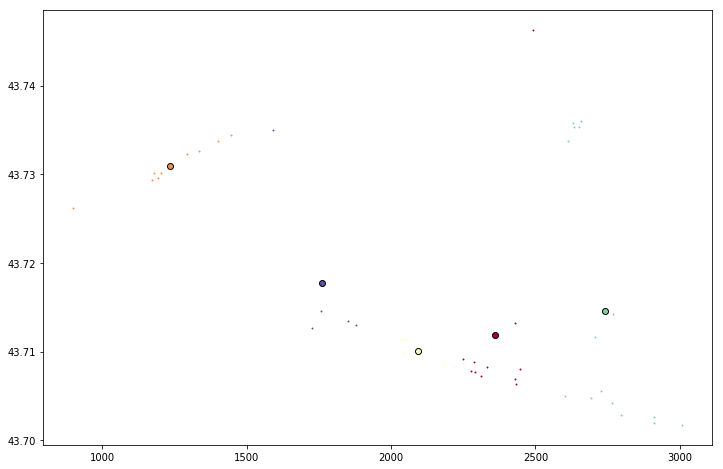

In [73]:
k_means3 = KMeans(init = "k-means++", n_clusters = 5, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(12, 8))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()

##### Modeling

In [74]:
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0 3 3
 3 3 3 1 1 1 1 1 1 1 1 1]


#### Insite

In [75]:
dfk["Clus_km"] = labels
dfk.head(2)

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,distance,lat,lng,Clus_km
36,4ad4c05cf964a52004f620e3,3007,43.701712,-79.397318,2
47,4ae24e96f964a5200e8d21e3,2911,43.702623,-79.397429,2


#### We can easily check the centroid values by averaging the features in each cluster
#### group By Clus_km

In [76]:
dfk.groupby('Clus_km').mean()

,distance,lat,lng
Clus_km,,,
0,2093.750000,43.710103,-79.395580
1,1235.666667,43.730912,-79.403304
2,2742.250000,43.714588,-79.396789
3,1760.800000,43.717730,-79.399427
4,2361.454545,43.711813,-79.391970


###  Alternative way 
##### Things can be done in different way
##### simple filtering and grouping

In [77]:
#dfs[['categories', 'name','address','neighborhood', 'postalCode','lat','lng']]
#dfs.loc[dfs['categoriesName'] == 'Indian Restaurant']
#dfs.loc[dfs['categoriesID'] == '4bf58dd8d48988d10f941735']

#dfs[dfs['categories'].str.contains("Restaurant")]
#dfs1 = dfs[dfs['categories'].str.contains('Indian Restaurant')]
arr=['54135bf5e4b08f3d2429dfe5','54135bf5e4b08f3d2429dff3','54135bf5e4b08f3d2429dff5',
                                '54135bf5e4b08f3d2429dfe2','54135bf5e4b08f3d2429dff2','54135bf5e4b08f3d2429dfe1',
                                '54135bf5e4b08f3d2429dfe3','54135bf5e4b08f3d2429dfe8','54135bf5e4b08f3d2429dfe9',
                                '54135bf5e4b08f3d2429dfe6','54135bf5e4b08f3d2429dfdf','54135bf5e4b08f3d2429dfe4',
                                '54135bf5e4b08f3d2429dfe7','54135bf5e4b08f3d2429dfea','54135bf5e4b08f3d2429dfeb',
                                '54135bf5e4b08f3d2429dfed','54135bf5e4b08f3d2429dfee','54135bf5e4b08f3d2429dff4',
                                '54135bf5e4b08f3d2429dfe0','54135bf5e4b08f3d2429dfdd','54135bf5e4b08f3d2429dff6',
                                '54135bf5e4b08f3d2429dfef','54135bf5e4b08f3d2429dff0','54135bf5e4b08f3d2429dff1',
                                '54135bf5e4b08f3d2429dfde','54135bf5e4b08f3d2429dfec','4bf58dd8d48988d10f941735']

dfs=dfs.loc[dfs['categoriesID'].isin(arr)]
#dfs.loc[dfs['categoriesName'] == 'Indian Restaurant']

In [78]:
neighborhood_latitude = CentralTdf.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = CentralTdf.loc[0, 'Longitude'] # neighborhood longitude value

In [79]:
# create map of Manhattan using latitude and longitude values
map_Central_Toronto = folium.Map(location=[neighborhood_latitude, neighborhood_longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(dfs['lat'], dfs['lng'], dfs['address']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Central_Toronto)  
    
map_Central_Toronto

#### Above process can be done for each and every Neighborhood of borough of Central Toronto

<a id='item2'></a>

## Methodology <a name="methodology"></a>


In this project we have put our efforts to find a location in In Central Toronto where number of Indian restaurant are minimum. We will limit our analysis to area = 5km around each neighborhood based on postal code.

In first step we have collected the required information about Toronto demography and Indian immigration data to justify the selection of city for opening Indian restaurant.

In second step we have collected the required **data: location and type (category) of postal codes of Toronto neighborhood.

In third step we collected the data related with Indian Restaurant of central Toronto neighborhoods within the rarious of 5KM. We have identified and located Indian Restaurant in neighborhood as per Foursquare categorization.

fourth and final step includes analysis of Foursquare data '**No of Indian restaurant in neighborhoods**' for identifying locations with minimum number of Indian Restaurants


## 2. Explore Neighborhoods in Central Toronto

In [80]:


# neighborhood_latitude, neighborhood_longitude, neighborhood_name


dfnColumns = ['name', 'categories', 'address', 'cc', 'city', 'country', 'crossStreet',
    'distance', 'formattedAddress', 'labeledLatLngs', 'lat', 'lng',
    'postalCode', 'state', 'id', 'categoriesID', 'categoriesName',
    'neighborhoodName', 'neighborhoodLatitude', 'neighborhoodLongitude']
dfn = pd.DataFrame(columns=dfnColumns)
    
for name, lat, lng in zip(CentralTdf['Neighborhood'], CentralTdf['Latitude'], CentralTdf['Longitude']):
    #print(name)
    #print(lat)
    #print(lng)
    search_query = 'Indian Restaurant'
    LIMIT = 100 # limit of number of venues returned by Foursquare API
    radius = 5000 # define radius

    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        lat, 
        lng, 
        VERSION, 
        search_query, 
        radius, 
        LIMIT)   
    #print(url)   
    results = requests.get(url).json()
    rest = results['response']['venues']

    # tranform venues into a dataframe
    Restdf = json_normalize(rest)

    # keep only columns that include venue name, and anything that is associated with location
    filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
    dataframe_filtered = Restdf.loc[:, filtered_columns]

    # filter the categoryID and catogryName for each row
    dataframe_filtered['categoriesID'] = dataframe_filtered.apply(get_category_typeID, axis=1)
    dataframe_filtered['categoriesName'] = dataframe_filtered.apply(get_category_typeName, axis=1)
    # clean column names by keeping only last term
    dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
    # dfs=dataframe_filtered.sort_values(['distance'], ascending=[0])
    dfs = dataframe_filtered
    dfs['neighborhoodName'] = name
    dfs['neighborhoodLatitude'] = lat
    dfs['neighborhoodLongitude'] = lng
    dfn=dfn.append(dfs,ignore_index = True)
        



In [81]:
dfn.shape

(450, 20)

In [82]:
dfn.head(2)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id,categoriesID,categoriesName,neighborhoodName,neighborhoodLatitude,neighborhoodLongitude
0,Patio Indian Restaurant,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",15 Gervais Dr.,CA,Toronto,Canada,across superstore,4324,"[15 Gervais Dr. (across superstore), Toronto O...","[{'label': 'display', 'lat': 43.722103, 'lng':...",43.722103,-79.335655,M3C 1Y8,ON,59e94c0260255e613b025e38,4bf58dd8d48988d10f941735,Indian Restaurant,Lawrence Park,43.72802,-79.38879
1,Roti King West Indian Restaurant,"[{'id': '4bf58dd8d48988d144941735', 'name': 'C...",NaN,CA,Toronto,Canada,NaN,5768,"[Toronto ON, Canada]","[{'label': 'display', 'lat': 43.69659146611285...",43.696591,-79.445784,NaN,ON,4dbb05154b222080d36d3d2f,4bf58dd8d48988d144941735,Caribbean Restaurant,Lawrence Park,43.72802,-79.38879


In [83]:
# create map of Manhattan using latitude and longitude values
map_Central_Toronto = folium.Map(location=[neighborhood_latitude, neighborhood_longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(dfs['lat'], dfn['lng'], dfs['address']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Central_Toronto)  
    
map_Central_Toronto

In [84]:
#nearby_venues.loc[nearby_venues['categoriesName'] == 'Indian Restaurant']
#nearby_venues.sort_values(by=['categories'])
#nearby_venues.shape
arr=['54135bf5e4b08f3d2429dfe5','54135bf5e4b08f3d2429dff3','54135bf5e4b08f3d2429dff5',
                                '54135bf5e4b08f3d2429dfe2','54135bf5e4b08f3d2429dff2','54135bf5e4b08f3d2429dfe1',
                                '54135bf5e4b08f3d2429dfe3','54135bf5e4b08f3d2429dfe8','54135bf5e4b08f3d2429dfe9',
                                '54135bf5e4b08f3d2429dfe6','54135bf5e4b08f3d2429dfdf','54135bf5e4b08f3d2429dfe4',
                                '54135bf5e4b08f3d2429dfe7','54135bf5e4b08f3d2429dfea','54135bf5e4b08f3d2429dfeb',
                                '54135bf5e4b08f3d2429dfed','54135bf5e4b08f3d2429dfee','54135bf5e4b08f3d2429dff4',
                                '54135bf5e4b08f3d2429dfe0','54135bf5e4b08f3d2429dfdd','54135bf5e4b08f3d2429dff6',
                                '54135bf5e4b08f3d2429dfef','54135bf5e4b08f3d2429dff0','54135bf5e4b08f3d2429dff1',
                                '54135bf5e4b08f3d2429dfde','54135bf5e4b08f3d2429dfec','4bf58dd8d48988d10f941735']

dfni=dfn.loc[dfn['categoriesID'].isin(arr)]

In [85]:
dfni.shape

(96, 20)

In [86]:
dfni.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id,categoriesID,categoriesName,neighborhoodName,neighborhoodLatitude,neighborhoodLongitude
0,Patio Indian Restaurant,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",15 Gervais Dr.,CA,Toronto,Canada,across superstore,4324,"[15 Gervais Dr. (across superstore), Toronto O...","[{'label': 'display', 'lat': 43.722103, 'lng':...",43.722103,-79.335655,M3C 1Y8,ON,59e94c0260255e613b025e38,4bf58dd8d48988d10f941735,Indian Restaurant,Lawrence Park,43.72802,-79.38879
2,Indian Bread Bar,"[{'id': '54135bf5e4b08f3d2429dfdd', 'name': 'N...",3305 Yonge St,CA,Toronto,Canada,NaN,1179,"[3305 Yonge St, Toronto ON M4N 2L8, Canada]","[{'label': 'display', 'lat': 43.73014794502956...",43.730148,-79.403153,M4N 2L8,ON,54dd1704498e6bef053d2cdf,54135bf5e4b08f3d2429dfdd,North Indian Restaurant,Lawrence Park,43.72802,-79.38879
3,Indian Street Food Co.,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",1701 Bayview,CA,Toronto,Canada,Eglinton,2448,"[1701 Bayview (Eglinton), Toronto ON, Canada]","[{'label': 'display', 'lat': 43.7080316171988,...",43.708032,-79.376086,NaN,ON,5650eed9498e376aac0c2478,4bf58dd8d48988d10f941735,Indian Restaurant,Lawrence Park,43.72802,-79.38879
5,Indian Crown,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...","4750 Yonge St, Unit 144",CA,Toronto,Canada,NaN,4032,"[4750 Yonge St, Unit 144, Toronto ON M2N 0K6, ...","[{'label': 'display', 'lat': 43.760076, 'lng':...",43.760076,-79.412153,M2N 0K6,ON,5a3aa72566fc6574a8e6df2e,4bf58dd8d48988d10f941735,Indian Restaurant,Lawrence Park,43.72802,-79.38879
6,Banjara Indian Cuisine,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",164 Eglinton Ave E,CA,Toronto,Canada,at Redpath Ave,2278,"[164 Eglinton Ave E (at Redpath Ave), Toronto ...","[{'label': 'display', 'lat': 43.7078104847312,...",43.707810,-79.393296,NaN,ON,4b7ccc72f964a520e3a52fe3,4bf58dd8d48988d10f941735,Indian Restaurant,Lawrence Park,43.72802,-79.38879


In [87]:
# create map of Toronto using latitude and longitude values
map_Central_Toronto = folium.Map(location=[neighborhood_latitude, neighborhood_longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(dfs['lat'], dfni['lng'], dfs['address']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Central_Toronto)  
    
map_Central_Toronto

#### Let's check the size of the resulting dataframe

In [88]:
print(dfni.shape)
#dfni=dfni.sort_values(by=['neighborhoodName', 'name'])
dfni["distance"] = pd.to_numeric(dfni["distance"])
dfni=dfni.sort_values(by=['name','distance'])
dfni1 = dfni[['neighborhoodName','categoriesName','name','distance','formattedAddress','lat','lng','id']]
dfni1.head()

(96, 20)


/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,neighborhoodName,categoriesName,name,distance,formattedAddress,lat,lng,id
400,"The Annex, North Midtown, Yorkville",Indian Restaurant,Aroma Fine Indian Restaurant,3194,"[287 King St. W (at John St.), Toronto ON M5V ...",43.646463,-79.389644,4aef8854f964a5201cd921e3
250,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",Indian Restaurant,Aroma Fine Indian Restaurant,4525,"[287 King St. W (at John St.), Toronto ON M5V ...",43.646463,-79.389644,4aef8854f964a5201cd921e3
200,"Moore Park, Summerhill East",Indian Restaurant,Aroma Fine Indian Restaurant,4827,"[287 King St. W (at John St.), Toronto ON M5V ...",43.646463,-79.389644,4aef8854f964a5201cd921e3
350,"Forest Hill North, Forest Hill West",Indian Restaurant,Aroma Fine Indian Restaurant,5884,"[287 King St. W (at John St.), Toronto ON M5V ...",43.646463,-79.389644,4aef8854f964a5201cd921e3
153,Davisville,Indian Restaurant,Banjara Indian Cuisine,531,"[164 Eglinton Ave E (at Redpath Ave), Toronto ...",43.707810,-79.393296,4b7ccc72f964a520e3a52fe3


In [89]:
dfni1['name'].unique()

array(['Aroma Fine Indian Restaurant', 'Banjara Indian Cuisine',
       'Bhoj Indian Cuisine', 'Chef of India', 'Earth Indian Express',
       'Eat Indian By Amaya', 'Indian Biriyani House', 'Indian Bread Bar',
       'Indian Crown', 'Indian Roti House', 'Indian Street Food Co.',
       "Joe's Indian Restaurant", 'Kothur Indian Cuisine',
       'Maja Indian Cuisine', 'Marigold Indian Bistro', 'Maroli',
       'Mt Everest Restaurant', 'Patio Indian Restaurant',
       'Savera Indian Cuisine', 'The Famous Indian Restaurant',
       'Waterfalls restaurant'], dtype=object)

#### Create a list of restaurant in cetral Toronto Neighborhoods

In [90]:
restlist = dfni1['name'].unique().tolist()
restlist

['Aroma Fine Indian Restaurant',
 'Banjara Indian Cuisine',
 'Bhoj Indian Cuisine',
 'Chef of India',
 'Earth Indian Express',
 'Eat Indian By Amaya',
 'Indian Biriyani House',
 'Indian Bread Bar',
 'Indian Crown',
 'Indian Roti House',
 'Indian Street Food Co.',
 "Joe's Indian Restaurant",
 'Kothur Indian Cuisine',
 'Maja Indian Cuisine',
 'Marigold Indian Bistro',
 'Maroli',
 'Mt Everest Restaurant',
 'Patio Indian Restaurant',
 'Savera Indian Cuisine',
 'The Famous Indian Restaurant',
 'Waterfalls restaurant']

#### Save dataframe to csv file

In [91]:
dfni1.to_csv('CentralTorontoIndianRestaurant.csv', index=False)

In [92]:
try:
    print("Reading csv File ...")
    File = 'CentralTorontoIndianRestaurant.csv'
    IndianRestdf = pd.read_csv(File)
    print("csv file read  successful !")
except:
    print("ERROR: could not read csv file.\n")

Reading csv File ...
csv file read  successful !


In [93]:
IndianRestdf.head()


,neighborhoodName,categoriesName,name,distance,formattedAddress,lat,lng,id
0,"The Annex, North Midtown, Yorkville",Indian Restaurant,Aroma Fine Indian Restaurant,3194,"['287 King St. W (at John St.)', 'Toronto ON M...",43.646463,-79.389644,4aef8854f964a5201cd921e3
1,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",Indian Restaurant,Aroma Fine Indian Restaurant,4525,"['287 King St. W (at John St.)', 'Toronto ON M...",43.646463,-79.389644,4aef8854f964a5201cd921e3
2,"Moore Park, Summerhill East",Indian Restaurant,Aroma Fine Indian Restaurant,4827,"['287 King St. W (at John St.)', 'Toronto ON M...",43.646463,-79.389644,4aef8854f964a5201cd921e3
3,"Forest Hill North, Forest Hill West",Indian Restaurant,Aroma Fine Indian Restaurant,5884,"['287 King St. W (at John St.)', 'Toronto ON M...",43.646463,-79.389644,4aef8854f964a5201cd921e3
4,Davisville,Indian Restaurant,Banjara Indian Cuisine,531,"['164 Eglinton Ave E (at Redpath Ave)', 'Toron...",43.707810,-79.393296,4b7ccc72f964a520e3a52fe3


## Results <a name="results"></a>

Let's perform some basic explanatory data analysis and derive some additional info from our raw data. First let's count the **number of Indian restaurants in every area neighorhood**:

##### Due to selection of a bit larger radius in foursquare search, there are some overlaps in selected circular area and as result some restaurants selected in multiple neighborhoods of Central Toronto.
##### We can overcome this problem by either reducing the search radius or remove restaurants reflected in multiple neighborhoods by using distance column
##### *Restaurant with minimum distance belongs to that neighborhood
##### Here we will use distance column to fix this problem and get unique restaurant for neighborhoods

In [94]:
RestClm= ['neighborhoodName', 'categoriesName', 'name', 'distance',
       'formattedAddress', 'lat', 'lng','id']
IndianRestUdf = pd.DataFrame(columns=RestClm)

for rest in restlist:
    tempdf = IndianRestdf[IndianRestdf['name'] == rest]
    tempdf=tempdf.sort_values(by = ['distance'], ascending=[1])
    IndianRestUdf=IndianRestUdf.append(tempdf.head(1),ignore_index = True)
IndianRestUdf.sort_values(by=['neighborhoodName','name'])

,neighborhoodName,categoriesName,name,distance,formattedAddress,lat,lng,id
1,Davisville,Indian Restaurant,Banjara Indian Cuisine,531,"['164 Eglinton Ave E (at Redpath Ave)', 'Toron...",43.707810,-79.393296,4b7ccc72f964a520e3a52fe3
5,Davisville,Indian Restaurant,Eat Indian By Amaya,1104,"['1574 Bayview Ave. (Belsize Ave.)', 'Toronto ...",43.705592,-79.375178,4c51e0069d642d7f4aef50de
10,Davisville,Indian Restaurant,Indian Street Food Co.,1102,"['1701 Bayview (Eglinton)', 'Toronto ON', 'Can...",43.708032,-79.376086,5650eed9498e376aac0c2478
14,Davisville,Indian Restaurant,Marigold Indian Bistro,172,"['552 Mount Pleasant Rd.', 'Toronto ON', 'Cana...",43.702881,-79.388008,5169d445e4b07de190b5c3d6
16,Davisville North,Indian Restaurant,Mt Everest Restaurant,1905,['804 Eglinton East (Eglinton and Sutherland)'...,43.713266,-79.366520,504bcf32e4b0ef19b0e2ecf8
3,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",Indian Restaurant,Chef of India,525,"['1436 Yonge St. (at St. Clair Ave. W)', 'Toro...",43.687391,-79.393663,4b7c2a4ff964a52087812fe3
4,"Forest Hill North, Forest Hill West",Indian Restaurant,Earth Indian Express,969,"['Toronto ON', 'Canada']",43.704890,-79.406352,4ffb595be4b068da7038dcfb
18,"Forest Hill North, Forest Hill West",Indian Restaurant,Savera Indian Cuisine,2406,"['815 St Clair Ave W (at Atlas Ave)', 'Toronto...",43.680578,-79.430832,4ae09642f964a520a68021e3
7,Lawrence Park,North Indian Restaurant,Indian Bread Bar,1179,"['3305 Yonge St', 'Toronto ON M4N 2L8', 'Canada']",43.730148,-79.403153,54dd1704498e6bef053d2cdf
8,Lawrence Park,Indian Restaurant,Indian Crown,4032,"['4750 Yonge St, Unit 144', 'Toronto ON M2N 0K...",43.760076,-79.412153,5a3aa72566fc6574a8e6df2e


In [95]:
IndianRestUdf.shape

(21, 8)

Let's check how many Indian Restaurants were returned for each neighborhood

In [96]:
IndianRestGdf = IndianRestUdf.groupby('neighborhoodName').count()
#IndianRestGdf.reset_index(inplace=True)


In [97]:
IndianRestGdf = IndianRestGdf[['name']]
IndianRestGdf.columns= [['Indian Restaurants']]
IndianRestGdf

,Indian Restaurants
neighborhoodName,
Davisville,4
Davisville North,1
"Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West",1
"Forest Hill North, Forest Hill West",2
Lawrence Park,3
"Moore Park, Summerhill East",4
"The Annex, North Midtown, Yorkville",6


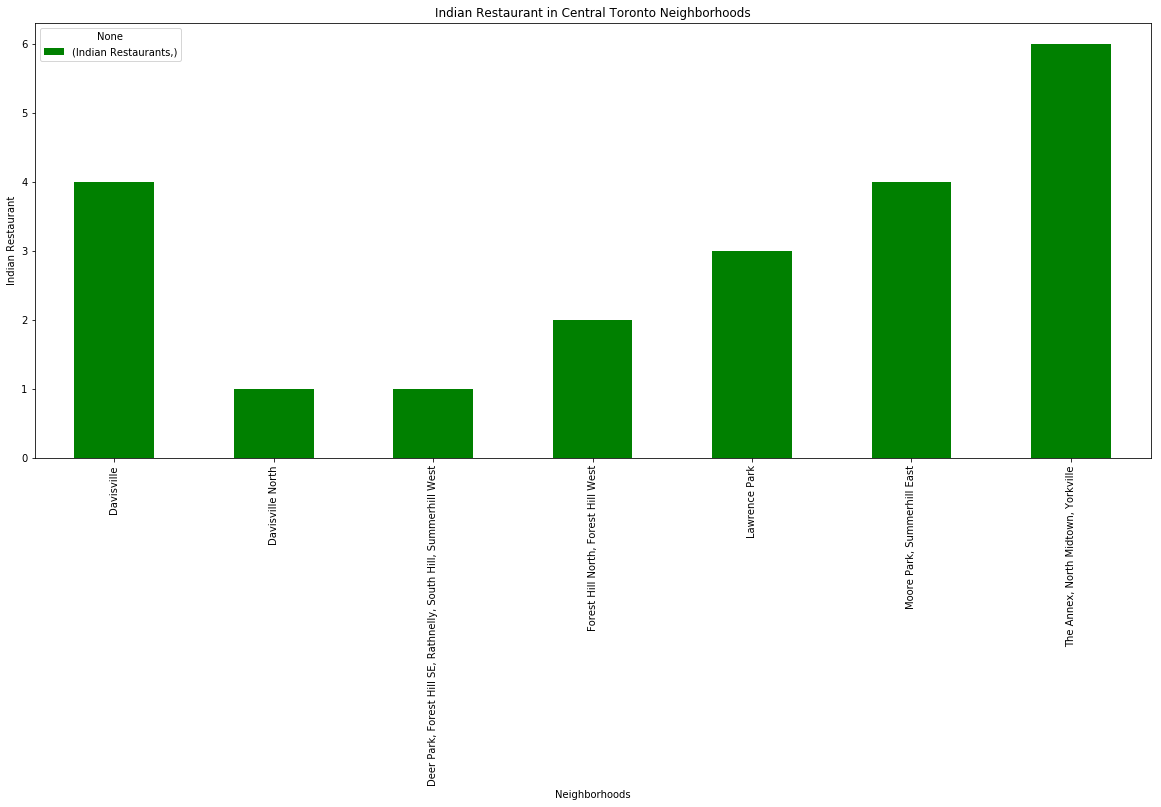

In [98]:

#IndianRestGdf.index = IndianRestGdf.index.map(int)
IndianRestGdf.plot(kind='bar', figsize=(20, 8), color='green')

plt.title('Indian Restaurant in Central Toronto Neighborhoods')
plt.ylabel('Indian Restaurant')
plt.xlabel('Neighborhoods')
plt.show()

#### We have 2 Neighborhood in Central Toronto where only 1 Indian Restaurant

In [99]:
Nlist = IndianRestUdf['neighborhoodName'].unique().tolist()

for nebour in Nlist:
    print(nebour)

The Annex, North Midtown, Yorkville
Davisville
Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
Forest Hill North, Forest Hill West
Lawrence Park
Moore Park, Summerhill East
Davisville North


<a id='item3'></a>

## Analyze Each Neighborhood

In [100]:
IndianRestUdf[IndianRestUdf['neighborhoodName'] =='The Annex, North Midtown, Yorkville']

,neighborhoodName,categoriesName,name,distance,formattedAddress,lat,lng,id
0,"The Annex, North Midtown, Yorkville",Indian Restaurant,Aroma Fine Indian Restaurant,3194,"['287 King St. W (at John St.)', 'Toronto ON M...",43.646463,-79.389644,4aef8854f964a5201cd921e3
2,"The Annex, North Midtown, Yorkville",Indian Restaurant,Bhoj Indian Cuisine,1337,"['21 Davenport Rd', 'Toronto ON M5R 1H2', 'Can...",43.672765,-79.389063,56c743c7498e7033ff262ce2
6,"The Annex, North Midtown, Yorkville",Indian Restaurant,Indian Biriyani House,2486,"['181 Dundas St W (W of Chestnut St)', 'Toront...",43.655120,-79.386645,4afd920ff964a520ad2822e3
11,"The Annex, North Midtown, Yorkville",Indian Restaurant,Joe's Indian Restaurant,2529,['Canada'],43.658150,-79.381563,5165c333e4b07a7ad88d8a69
15,"The Annex, North Midtown, Yorkville",Indian Restaurant,Maroli,1159,"['630 Bloor St West (Euclid)', 'Toronto ON M6G...",43.664475,-79.414487,4b02ecc8f964a520114b22e3
20,"The Annex, North Midtown, Yorkville",Indian Restaurant,Waterfalls restaurant,1075,"['303 Augusta Ave', 'Toronto ON', 'Canada']",43.670130,-79.392800,4e7e17295503d17f912287fc


In [101]:
IndianRestUdf[IndianRestUdf['neighborhoodName'] =='Davisville']

,neighborhoodName,categoriesName,name,distance,formattedAddress,lat,lng,id
1,Davisville,Indian Restaurant,Banjara Indian Cuisine,531,"['164 Eglinton Ave E (at Redpath Ave)', 'Toron...",43.707810,-79.393296,4b7ccc72f964a520e3a52fe3
5,Davisville,Indian Restaurant,Eat Indian By Amaya,1104,"['1574 Bayview Ave. (Belsize Ave.)', 'Toronto ...",43.705592,-79.375178,4c51e0069d642d7f4aef50de
10,Davisville,Indian Restaurant,Indian Street Food Co.,1102,"['1701 Bayview (Eglinton)', 'Toronto ON', 'Can...",43.708032,-79.376086,5650eed9498e376aac0c2478
14,Davisville,Indian Restaurant,Marigold Indian Bistro,172,"['552 Mount Pleasant Rd.', 'Toronto ON', 'Cana...",43.702881,-79.388008,5169d445e4b07de190b5c3d6


In [102]:
IndianRestUdf[IndianRestUdf['neighborhoodName'] =='Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West']

,neighborhoodName,categoriesName,name,distance,formattedAddress,lat,lng,id
3,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",Indian Restaurant,Chef of India,525,"['1436 Yonge St. (at St. Clair Ave. W)', 'Toro...",43.687391,-79.393663,4b7c2a4ff964a52087812fe3


In [103]:
IndianRestUdf[IndianRestUdf['neighborhoodName'] =='Forest Hill North, Forest Hill West']

,neighborhoodName,categoriesName,name,distance,formattedAddress,lat,lng,id
4,"Forest Hill North, Forest Hill West",Indian Restaurant,Earth Indian Express,969,"['Toronto ON', 'Canada']",43.704890,-79.406352,4ffb595be4b068da7038dcfb
18,"Forest Hill North, Forest Hill West",Indian Restaurant,Savera Indian Cuisine,2406,"['815 St Clair Ave W (at Atlas Ave)', 'Toronto...",43.680578,-79.430832,4ae09642f964a520a68021e3


In [104]:
IndianRestUdf[IndianRestUdf['neighborhoodName'] =='Lawrence Park']

,neighborhoodName,categoriesName,name,distance,formattedAddress,lat,lng,id
7,Lawrence Park,North Indian Restaurant,Indian Bread Bar,1179,"['3305 Yonge St', 'Toronto ON M4N 2L8', 'Canada']",43.730148,-79.403153,54dd1704498e6bef053d2cdf
8,Lawrence Park,Indian Restaurant,Indian Crown,4032,"['4750 Yonge St, Unit 144', 'Toronto ON M2N 0K...",43.760076,-79.412153,5a3aa72566fc6574a8e6df2e
17,Lawrence Park,Indian Restaurant,Patio Indian Restaurant,4324,"['15 Gervais Dr. (across superstore)', 'Toront...",43.722103,-79.335655,59e94c0260255e613b025e38


In [105]:
IndianRestUdf[IndianRestUdf['neighborhoodName'] =='Moore Park, Summerhill East']

,neighborhoodName,categoriesName,name,distance,formattedAddress,lat,lng,id
9,"Moore Park, Summerhill East",Indian Restaurant,Indian Roti House,2812,"['Toronto ON', 'Canada']",43.664382,-79.380468,547f94e9498e62f695829624
12,"Moore Park, Summerhill East",Indian Restaurant,Kothur Indian Cuisine,2424,"['649 Yonge St.', 'Toronto ON M4Y', 'Canada']",43.667872,-79.385659,4bedf8b5e24d20a17b567214
13,"Moore Park, Summerhill East",Indian Restaurant,Maja Indian Cuisine,1984,"['345 Bloor', 'Toronto ON', 'Canada']",43.672043,-79.378670,55f75919498ea2710ea79060
19,"Moore Park, Summerhill East",Indian Restaurant,The Famous Indian Restaurant,5288,"['1410 Gerrard St E (at Ashdale Ave)', 'Toront...",43.672339,-79.321941,4ae4c793f964a5201b9e21e3


In [106]:
IndianRestUdf[IndianRestUdf['neighborhoodName'] =='Davisville North']

,neighborhoodName,categoriesName,name,distance,formattedAddress,lat,lng,id
16,Davisville North,Indian Restaurant,Mt Everest Restaurant,1905,['804 Eglinton East (Eglinton and Sutherland)'...,43.713266,-79.36652,504bcf32e4b0ef19b0e2ecf8


### 1. Let's explore the Indian restaurant -- _Mt Everest Restaurant_ in Davisville North

In [107]:
venue_id = '504bcf32e4b0ef19b0e2ecf8' # ID of Mt Everest Restaurant
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/504bcf32e4b0ef19b0e2ecf8?client_id=KLM3YX5M4BPNZETT5BWB54OYFUOIPMY3OLWU1HYRJLWC4TC0&client_secret=2NZPASHCA2BNERJYMDDXZCL1WTU2NKX5XSKGOZQKYJWPGPXP&v=20180604'

#### Send GET request for result

In [108]:
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'url', 'price', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto', 'colors'])


{'id': '504bcf32e4b0ef19b0e2ecf8',
 'name': 'Mt Everest Restaurant',
 'contact': {'phone': '6477488849', 'formattedPhone': '(647) 748-8849'},
 'location': {'address': '804 Eglinton East',
  'crossStreet': 'Eglinton and Sutherland',
  'lat': 43.713265579296,
  'lng': -79.36652040161064,
  'labeledLatLngs': [{'label': 'display',
    'lat': 43.713265579296,
    'lng': -79.36652040161064}],
  'postalCode': 'M4G 2L1',
  'cc': 'CA',
  'city': 'East York',
  'state': 'ON',
  'country': 'Canada',
  'formattedAddress': ['804 Eglinton East (Eglinton and Sutherland)',
   'East York ON M4G 2L1',
   'Canada']},
 'canonicalUrl': 'https://foursquare.com/v/mt-everest-restaurant/504bcf32e4b0ef19b0e2ecf8',
 'categories': [{'id': '4bf58dd8d48988d10f941735',
   'name': 'Indian Restaurant',
   'pluralName': 'Indian Restaurants',
   'shortName': 'Indian',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_',
    'suffix': '.png'},
   'primary': True}],
 'verified': False,
 'stats': {'

### Get the venue's overall rating

In [109]:
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

6.4


That is not a very good rating. Let's check the rating of the another single Indian restaurant.

### 2. Let's explore the Indian restaurant -- _Chef of India_ in Deer Park, Forest Hill SE, Rathnelly, South Hi...

In [110]:
venue_id = '4b7c2a4ff964a52087812fe3' # ID of Chef of India Indian Restaurant
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


### In central Toronto user can chose any place near by Mt Everest Restaurant in Davisville North or Chef of India
### Both locations has only one Indian Restaurant with rating either average rating or not rated yet.

## Discussion <a name="discussions"></a>

In our analysis for opening a new Indian restaurant in world top business centers like Toronto in Canada  or San Francisco in USA, we initially focused on deciding a city between Toronto and San Francisco for for Indian Restaurant.

Due to recent change in US polices related to visa and immigrants which might effect thousands of working people in US and there is an speculations about outflow of talent and business towards Canada. So choice was clear i.e Toronto.

initially after selection of Toronto we focused on analysis of its multi ethnicity. We looked and analyze the presence of Indian or South Asian community and try to predict the immigration trends of Indian community towards Canada by 2025. This gives us a picture 
of how a new Indian restaurant can grow by 2025. In this analysis we have considered South Indian or Indian community as our prime customers for new business. We found the data very encouraging because South Asian community was one of the largest community present in Toronto and immigration trends shows it will increase by time.

For location analysis we first try to find different neighborhoods of Toronto by using M Postal codes. We also grouped some of the neighborhoods having common postal codes and find their latitude and longitude for location. We found Toronto as big city with so many boroughs and their neighborhoods. So we again narrow our search ares by focusing on only boroughs that contains the word 'Toronto'. We further narrow our search area by selecting Central Toronto borough and its neighborhood as our prime search area.

Our analysis shows that large number of restaurants present in Central Toronto and its neighborhoods. Using Foursquare API search  we looked for Indian Restaurant in each neighborhood within the radius of 5 KM. We have also used Foursquare Category for Indian Restaurant to filter the data. We find the density of Indian Restaurant by counting the number of Restaurants present in each neighborhood in Central Toronto borough.

During analysis we found that at radius of 5KM Foursquare API search area overlaps neighborhoods and this results in repeated names of Indian Restaurants but with different distance value. We used distance column with minimum value to fixed this problem and set the neighborhood of overlapping areas.

after analysis of Central Toronto Borough and its neighborhood for Indian Restaurant we found one of the neighborhood 'Davisville North' has only one Indian restaurant so this many be an ideal location for opening a new Indian Restaurant in Toronto. We also try to get ratings of its only Indian restaurant "Mt Everest Restaurant" which is not very good.

We found another candidate location for Indian Restaurant which has only one Indian restaurant "Deer Park..."


## Conclusion <a name="conclusion"></a>

Purpose of this project was to identify a location for opening a new Indian restaurants in order to aid stakeholders in narrowing down the search for optimal location for a new Indian restaurant. By analyzing  restaurant distribution from Foursquare data we have first identified general boroughs that justify further analysis (Central Toronto), and then generated extensive collection of locations which satisfy some basic requirements regarding existing nearby Indian restaurants. Clustering of those locations was not requires because some of the neighborhoods has only few Indian restaurants present so near by locations restaurants are good for opening a new Indian restaurant in Toronto .This works as a starting point for final exploration by stakeholders.

Final decission on optimal restaurant location will be made by stakeholders based on specific characteristics of neighborhoods and locations in every recommended zone, taking into consideration additional factors like attractiveness of each location (proximity to park or water), levels of noise / proximity to major roads, real estate availability, prices, social and economic dynamics of every neighborhood etc.